<a href="https://colab.research.google.com/github/PranavvNambiar/AWT-Shopping-Cart/blob/master/License_Plate_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***License Plate Detection***
> This repository contains the implementation of a License Plate Detection system using YOLOv9 and OpenCV. The project leverages the power of deep learning and computer vision to accurately detect license plates in images and video streams. A custom dataset has been used to train the YOLOv9 model, ensuring high accuracy and robustness in various real-world scenarios.


## Pre-Requisites
Checking to see if we have access to a GPU, which is mandatory

In [1]:
!nvidia-smi

Tue Aug  6 18:14:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
home = os.getcwd()
home

'/content'

### Cloning YoloV9 Github

In [3]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 325 (delta 159), reused 156 (delta 156), pack-reused 107
Receiving objects: 100% (325/325), 2.23 MiB | 26.61 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 136.7 kB/s eta 0:00:00


In [4]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.5 MB/s eta 0:00:00


### Importing the packages

In [5]:
import roboflow
from IPython.display import Image

### Model Weights
As the weights for certain YOLOv9 models are not available, we need to make a directory to store these weights

In [11]:
!mkdir -p {home}/weights

In [12]:
!wget -P {home}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt

In [13]:
!ls -la {home}/weights

total 100748
drwxr-xr-x 2 root root      4096 Aug  6 18:49 .
drwxr-xr-x 1 root root      4096 Aug  6 18:49 ..
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt


In [14]:
!mkdir -p {home}/data

In [15]:
img_path = f"{home}/sample_data/27.jpg"

## Object Detection with the Pre-Trained Model
We will use the yolov9-c model for this

In [19]:
!python detect.py --weights {home}/weights/yolov9-c.pt --conf 0.1 --source {home}/sample_data/27.jpg --device 0

detect: weights=['/content/weights/yolov9-c.pt'], source=/content/sample_data/27.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 724 layers, 51141120 parameters, 0 gradients, 238.7 GFLOPs
image 1/1 /content/sample_data/27.jpg: 512x640 1 train, 1 parking meter, 2 cell phones, 150.1ms
Speed: 0.5ms pre-process, 150.1ms inference, 659.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4


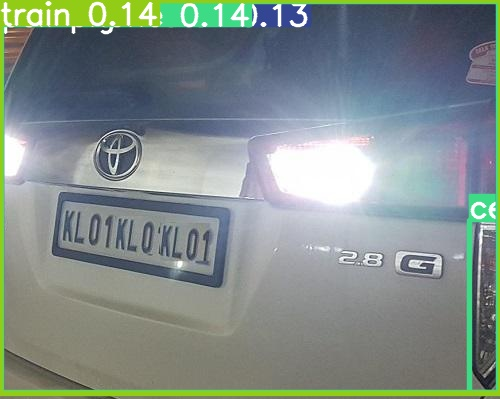

In [23]:
Image(filename=f"{home}/yolov9/runs/detect/exp2/27.jpg", width=600)

### Downloading the dataset into the Notebook

In [26]:
from google.colab import userdata
API = userdata.get('API_KEY')

%cd {home}/yolov9

from roboflow import Roboflow
rf = Roboflow(api_key=API)
project = rf.workspace("licenseplatedetection-dzoke").project("licenseplatedetection-r3nkc")
version = project.version(1)
dataset = version.download("yolov9")

/content/yolov9
loading Roboflow workspace...
loading Roboflow project...
